# Which stock is most profitable?
Twitter, Netflix, Snapchat, Uber

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pyfolio as pf
import empyrical
import quandl
from pandas_datareader import data, wb
from datetime import date
%matplotlib inline

C:\Users\minhn\AppData\Roaming\Python\Python36\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
start = pd.to_datetime('2019-05-10')
end = pd.to_datetime('2020-11-01')

twitter = data.DataReader('TWTR','yahoo', start, end)
netflix = data.DataReader('NFLX', 'yahoo', start, end)
uber = data.DataReader('UBER', 'yahoo', start, end)
snap = data.DataReader('SNAP', 'yahoo', start, end)
spy = data.DataReader('SPY', 'yahoo', start, end)

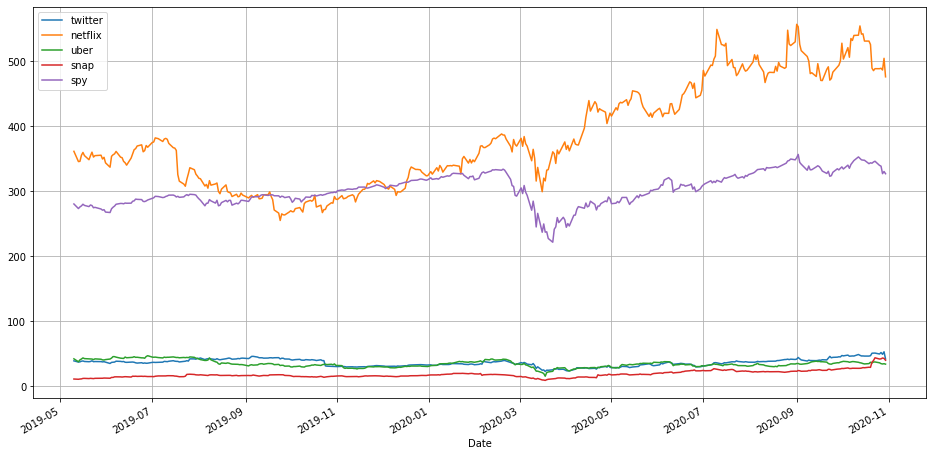

In [3]:
twitter['Adj Close'].plot(label = 'twitter', figsize = (16,8))
netflix['Adj Close'].plot(label = 'netflix')
uber['Adj Close'].plot(label = 'uber')
snap['Adj Close'].plot(label = 'snap')
spy['Adj Close'].plot(label = 'spy')
plt.grid()
plt.legend()

## Daily return
return = today / yesterday - 1

In [4]:
twitter['Returns'] = (1 + twitter['Adj Close']).pct_change(1)
netflix['Returns'] = (1 + netflix['Adj Close']).pct_change(1)
uber['Returns'] = (1 + uber['Adj Close']).pct_change(1)
snap['Returns'] = (1 + snap['Adj Close']).pct_change(1)
spy['Returns'] = (1 + spy['Adj Close']).pct_change(1)

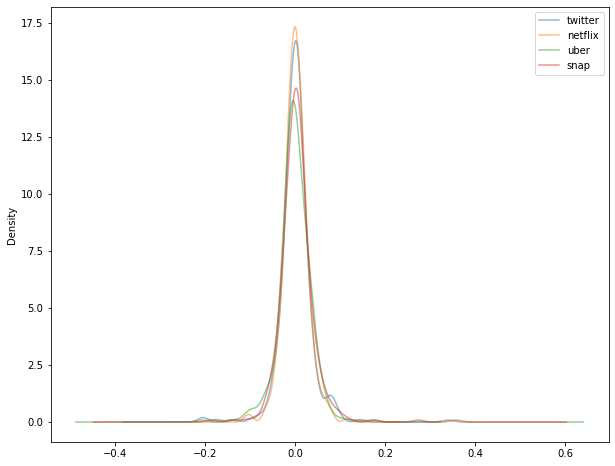

In [16]:
twitter['Returns'].plot(kind='kde', label='twitter',  alpha=0.5, figsize=(10,8))
netflix['Returns'].plot(kind='kde', label='netflix',  alpha=0.5)
uber['Returns'].plot(kind='kde', label = 'uber',  alpha=0.5)
snap['Returns'].plot(kind='kde', label = 'snap',  alpha=0.5)
plt.legend()

#uber, snap is not stable

## Cumulative return

In [6]:
twitter['Cumulative'] = (1 + twitter['Returns']).cumprod()
netflix['Cumulative'] = (1 + netflix['Returns']).cumprod()
uber['Cumulative'] = (1 + uber['Returns']).cumprod()
snap['Cumulative'] = (1 + snap['Returns']).cumprod()
spy['Cumulative'] = (1 + spy['Returns']).cumprod()

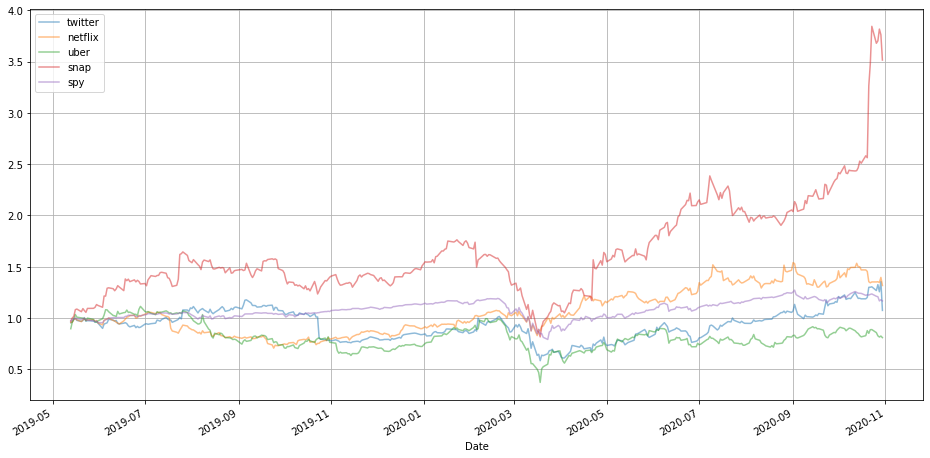

In [7]:
twitter['Cumulative'].plot(label = 'twitter', figsize = (16,8), alpha=0.5)
netflix['Cumulative'].plot(label = 'netflix', alpha=0.5)
uber['Cumulative'].plot(label = 'uber', alpha=0.5)
snap['Cumulative'].plot(label = 'snap', alpha=0.5)
spy['Cumulative'].plot(label = 'spy', alpha=0.5)
plt.grid()
plt.legend()

In [10]:
snap['Volume'].argmax()

C:\Users\minhn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2020-10-21 00:00:00')

In [11]:
aggregation = pd.concat([snap['Open'], twitter['Open'], netflix['Open'], spy['Open']], axis = 1)

In [12]:
aggregation.columns = ['snap', 'twitter', 'netflix', 'spy'];

In [13]:
aggregation.head()

,snap,twitter,netflix,spy
Date,,,,
2019-05-10,10.92,38.680000,361.619995,285.619995
2019-05-13,10.05,37.500000,352.290009,282.420013
2019-05-14,10.23,37.040001,348.709991,281.989990
2019-05-15,10.45,36.669998,343.339996,281.589996
2019-05-16,10.72,38.110001,356.369995,285.839996


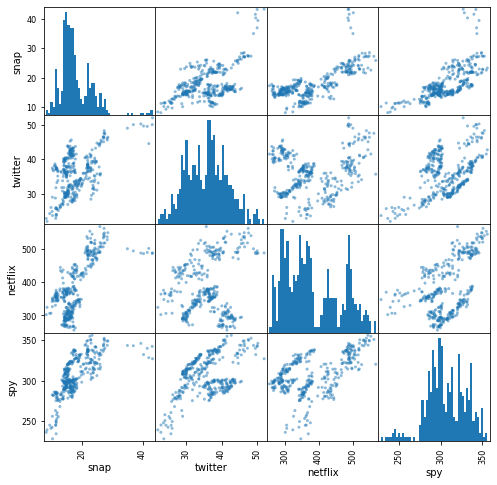

In [14]:
scatter_matrix(aggregation, figsize = (8, 8), alpha=0.5, hist_kwds={'bins': 50});

## Bollinger Bands
Volatility based on the standard deviation. Wide - high volatility, narrow - low volatility. Specify you want to sell or buy.
determine where the price is significant movement or not.

Upper = 20MA + 2*std(20)

Lower = 20MA - 2*std(20)

In [17]:
snap['Close 20 mean'] = snap['Adj Close'].rolling(20).mean()
snap['Upper'] =  snap['Close 20 mean'] + 1.96*(snap['Adj Close'].rolling(20).std())
snap['Lower'] =  snap['Close 20 mean'] - 1.96*(snap['Adj Close'].rolling(20).std())

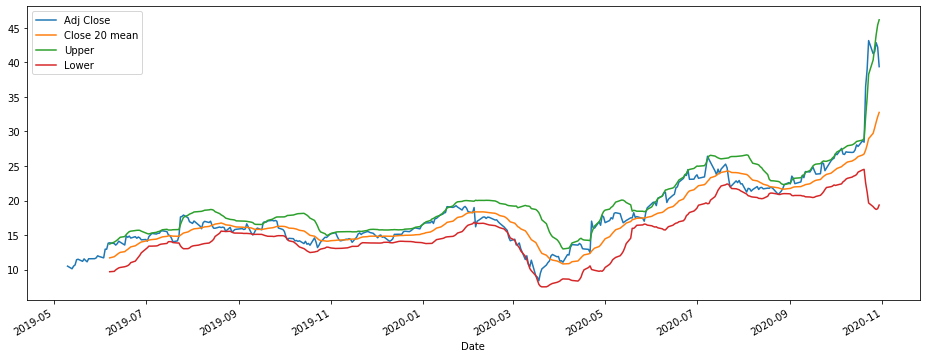

In [18]:
snap[['Adj Close', 'Close 20 mean', 'Upper', 'Lower']].plot(figsize=(16,6))